In [9]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [10]:
import metapredict as meta
import protfasta 

In [11]:
def calculate_mcc(TP,TN,FP,FN):
    a = (TP*TN) - (FP*FN)
    b = (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)
    
    return a / np.sqrt(b)

In [12]:
D = protfasta.read_fasta('data/Tretyachenko_et_al/seqs.fasta')

In [18]:
ordered = []
disordered = []
ordered_names = []
disordered_names = []


for k in D:
    if k.split('_')[1] == 'IDR':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k]).disordered_domains])/len(D[k])
        
        disordered.append(fraction_idr)
        disordered_names.append(k.split('_')[0])
        
    if k.split('_')[1] == 'ORD':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k]).disordered_domains])/len(D[k])
        
        ordered.append(fraction_idr)        
        ordered_names.append(k.split('_')[0])
        
        

meta NOT subset; don't know how to subset; dropped


MCC = 0.4183300132670378


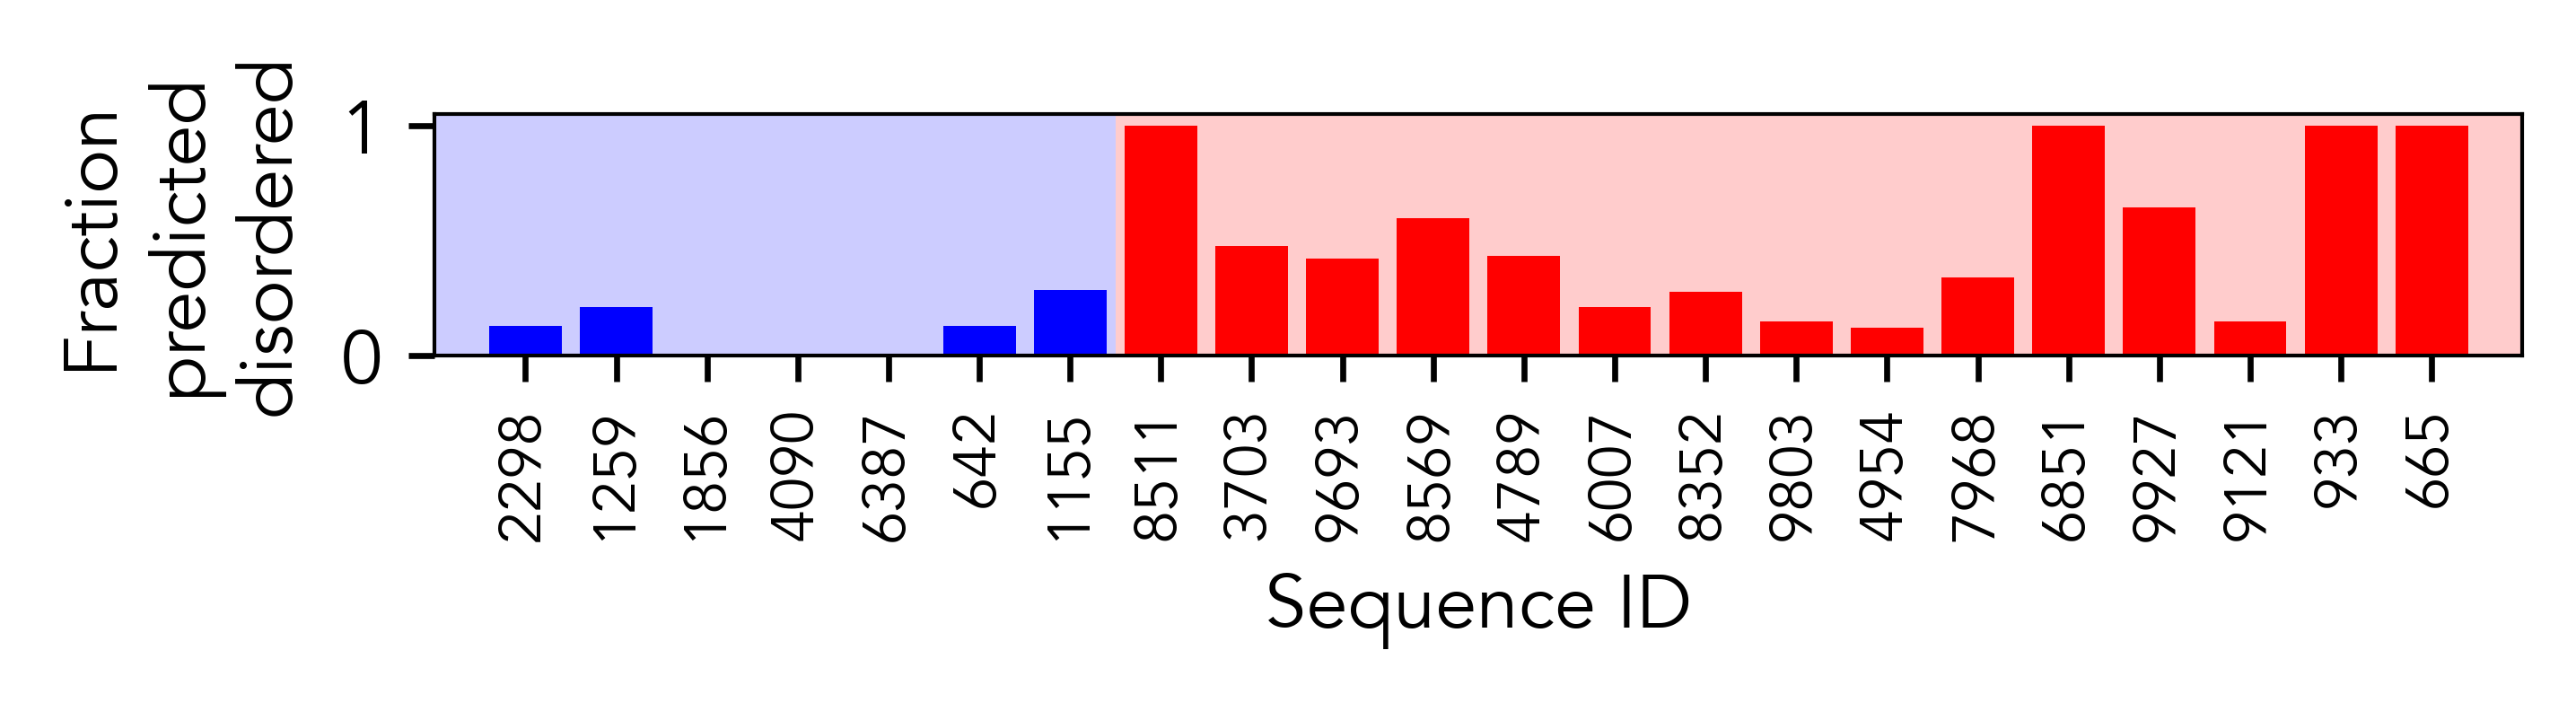

In [26]:

figure(num=None, figsize=(5, 1.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.bar(np.arange(1,len(ordered)+1), ordered, color='b')
plt.bar(np.arange(len(ordered)+1, len(ordered)+1+len(disordered)), disordered, color='r')

plt.xlabel('Sequence ID')
plt.ylabel('Fraction\npredicted\ndisordered')
names = ordered_names.copy()
names.extend(disordered_names)
plt.xticks(np.arange(1,len(ordered)+len(disordered)+1),names, rotation=90, fontsize=8) 
ax.axvspan(7.5,23,color='r',alpha=0.2,linewidth=0)
ax.axvspan(0,7.5,color='b',alpha=0.2,linewidth=0)
plt.xlim([0,23])

plt.tight_layout()
plt.savefig('figures/tretyachenko.pdf')

TP = 0
TN = 0
FP = 0
FN = 0

for i in ordered:
    if i > 0.5:
        FP = FP +1
    else:
        TN = TN + 1

for i in disordered:
    if i > 0.5:
        TP = TP +1
    else:
        FN = FN + 1
        
print(f"MCC = {calculate_mcc(TP,TN,FP,FN)}")    


In [17]:
len(ordered)

7

meta NOT subset; don't know how to subset; dropped


MCC = 0.4183300132670378


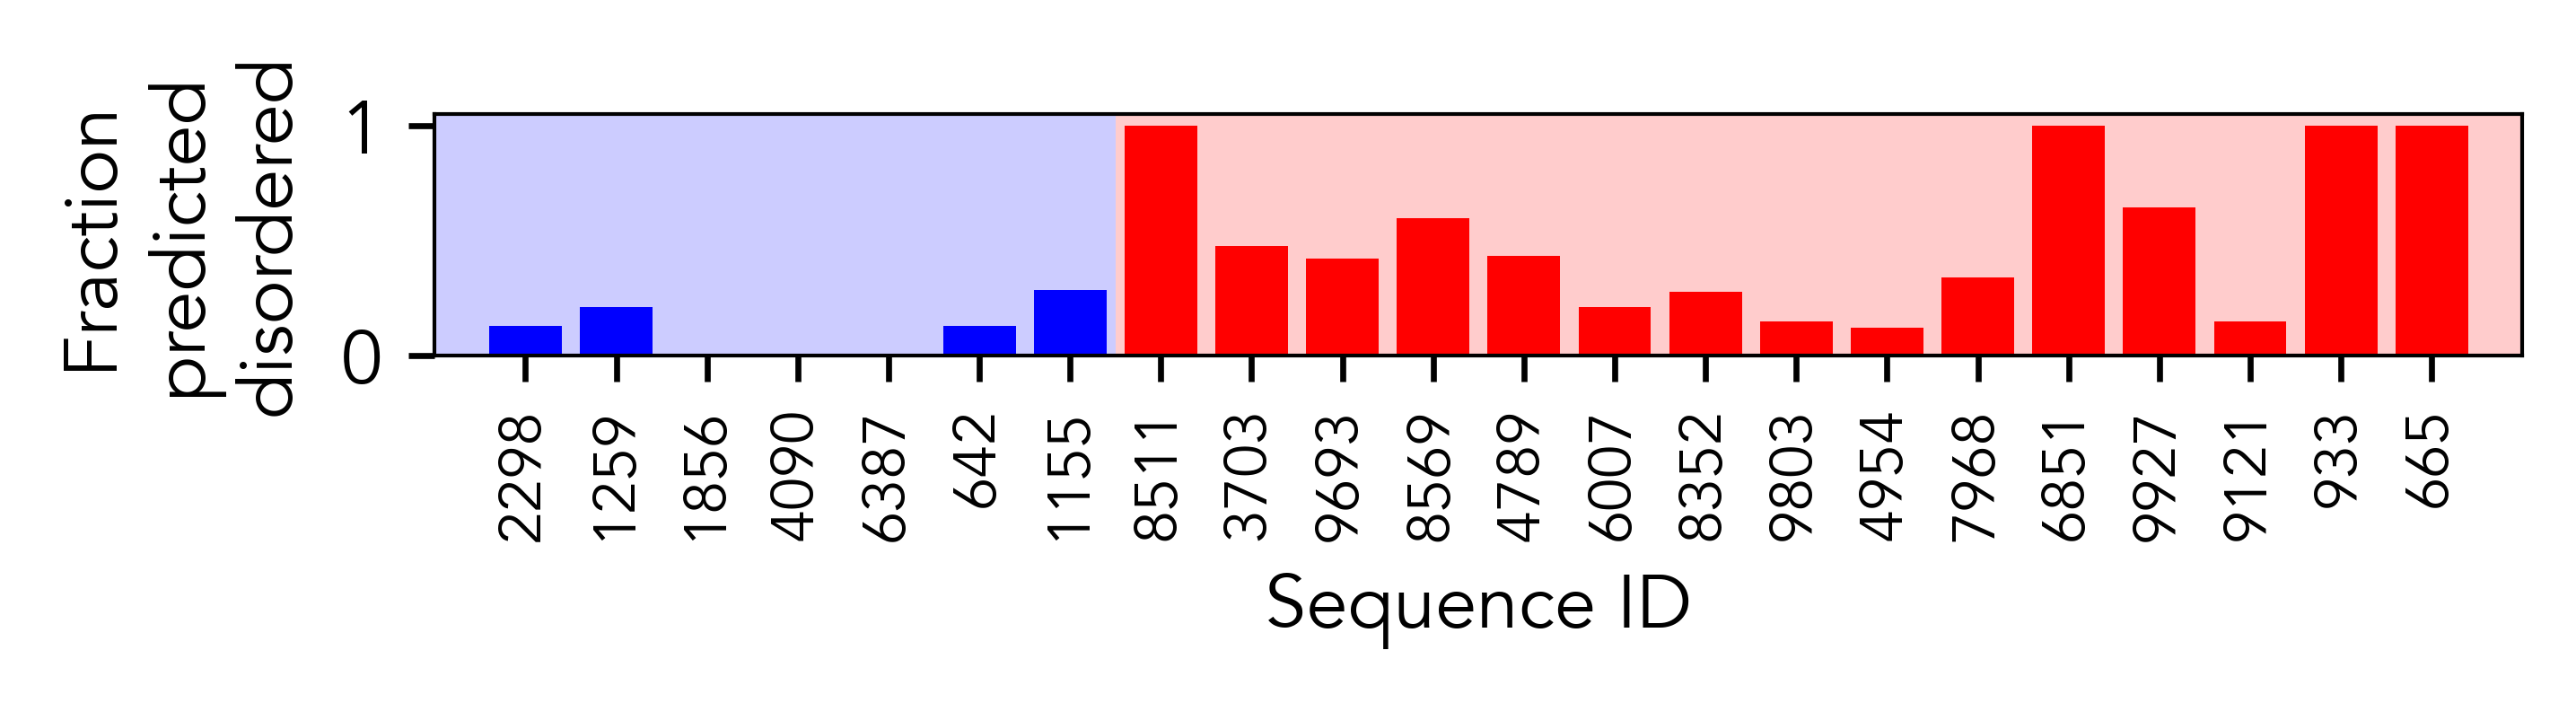

In [27]:
ordered = []
disordered = []
for k in D:
    if k.split('_')[1] == 'IDR':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k],legacy=True).disordered_domains])/len(D[k])
        
        disordered.append(fraction_idr)
        
    if k.split('_')[1] == 'ORD':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k],legacy=True).disordered_domains])/len(D[k])
        
        ordered.append(fraction_idr)        
        
        

figure(num=None, figsize=(5, 1.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.bar(np.arange(1,len(ordered)+1), ordered, color='b')
plt.bar(np.arange(len(ordered)+1, len(ordered)+1+len(disordered)), disordered, color='r')

plt.xlabel('Sequence ID')
plt.ylabel('Fraction\npredicted\ndisordered')
names = ordered_names.copy()
names.extend(disordered_names)
plt.xticks(np.arange(1,len(ordered)+len(disordered)+1),names, rotation=90, fontsize=8) 
ax.axvspan(7.5,23,color='r',alpha=0.2,linewidth=0)
ax.axvspan(0,7.5,color='b',alpha=0.2,linewidth=0)
plt.xlim([0,23])

plt.tight_layout()
plt.savefig('figures/tretyachenko_legacy.pdf')

TP = 0
TN = 0
FP = 0
FN = 0

for i in ordered:
    if i > 0.5:
        FP = FP +1
    else:
        TN = TN + 1

for i in disordered:
    if i > 0.5:
        TP = TP +1
    else:
        FN = FN + 1
        
print(f"MCC = {calculate_mcc(TP,TN,FP,FN)}")    
